In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

# Assignment 07: Autoencoders

We will look here at autoencoders which is a combination of two neural networks: one for compressing an input to lower dimensional space and one for upsampling again to the original size of the input. In the best case, this acts as an identity map. 

## Exercise 07.1: Image compression

In this exercise we will look at image compression and decompression, for which a convolutional neural network works best. First, load the MNIST data set. Every image therein consists of 28 x 28 pixels, meaning that the input space is $784$-dimensional. Thus, the decompressing should happen to a space of dimension $d < 784$. 

In [134]:
(x_train_unnormalized, y_train), (x_test_unnormalized, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train_unnormalized / 255, -1)
x_test = np.expand_dims(x_test_unnormalized / 255, -1)

In [145]:
input_img = keras.Input(shape=(28, 28, 1))
input_encoder = (28, 28, 1)

encoder_model = keras.Sequential(

    [
        keras.Input(shape=input_encoder),
        layers.Conv2D(32, kernel_size=(2, 2), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),        
        layers.Conv2D(32, kernel_size=(2, 2), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(64, kernel_size=(2,2), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    ]
)

encoder_model.summary()

input_decoder = (4, 4, 64)

decoder_model = keras.Sequential(

    [
        keras.Input(shape=input_decoder),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu", padding='same'),
        layers.UpSampling2D(size=(2, 2)),        
        layers.Conv2D(32, kernel_size=(2, 2), activation="relu"),
        layers.UpSampling2D(size=(2,2)),
        layers.Conv2D(32, kernel_size=(2,2), activation='relu', padding='same'),
        layers.UpSampling2D(size=(2,2)),
        layers.Conv2D(1, (2, 2), activation='sigmoid', padding='same')
    ]
)

decoder_model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_166 (Conv2D)             │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_167 (Conv2D)             │ (None, 14, 14, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_168 (Conv2D)             │ (None, 7, 7, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,544 (49.00 KB)

 Trainable params: 12,544 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_169 (Conv2D)             │ (None, 4, 4, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_61 (UpSampling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_170 (Conv2D)             │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_62 (UpSampling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_171 (Conv2D)             │ (None, 14, 14, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_63 (UpSampling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_172 (Conv2D)             │ (None, 28, 28, 1)      │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,929 (113.00 KB)

 Trainable params: 28,929 (113.00 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
autencoder = keras.Model(input_img, decoder_model(encoder_model(input_img)))

In [147]:
epochs = 20
batch_size = 128

autencoder.compile(optimizer='adam', loss='binary_crossentropy')
autencoder.fit(x_train, x_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.3141
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1437
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1238
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1135
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1077
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1037
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1005
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0982
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0965
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0950
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0936
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0925
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0915
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0905
Epoch 15/20
469/469 ━━━━━━━━━

Now that we have trained the model, let us look at the compression and the decompression for ten randomly chosen pictures. 

In [136]:
import random
test_imgs = x_test[random.choices(range(10000), k=10)]

In [148]:
test_imgs_encoded = encoder_model(test_imgs)
test_imgs_decoded = decoder_model(test_imgs_encoded)

In [149]:
test_imgs_encoded[0].shape

TensorShape([4, 4, 64])

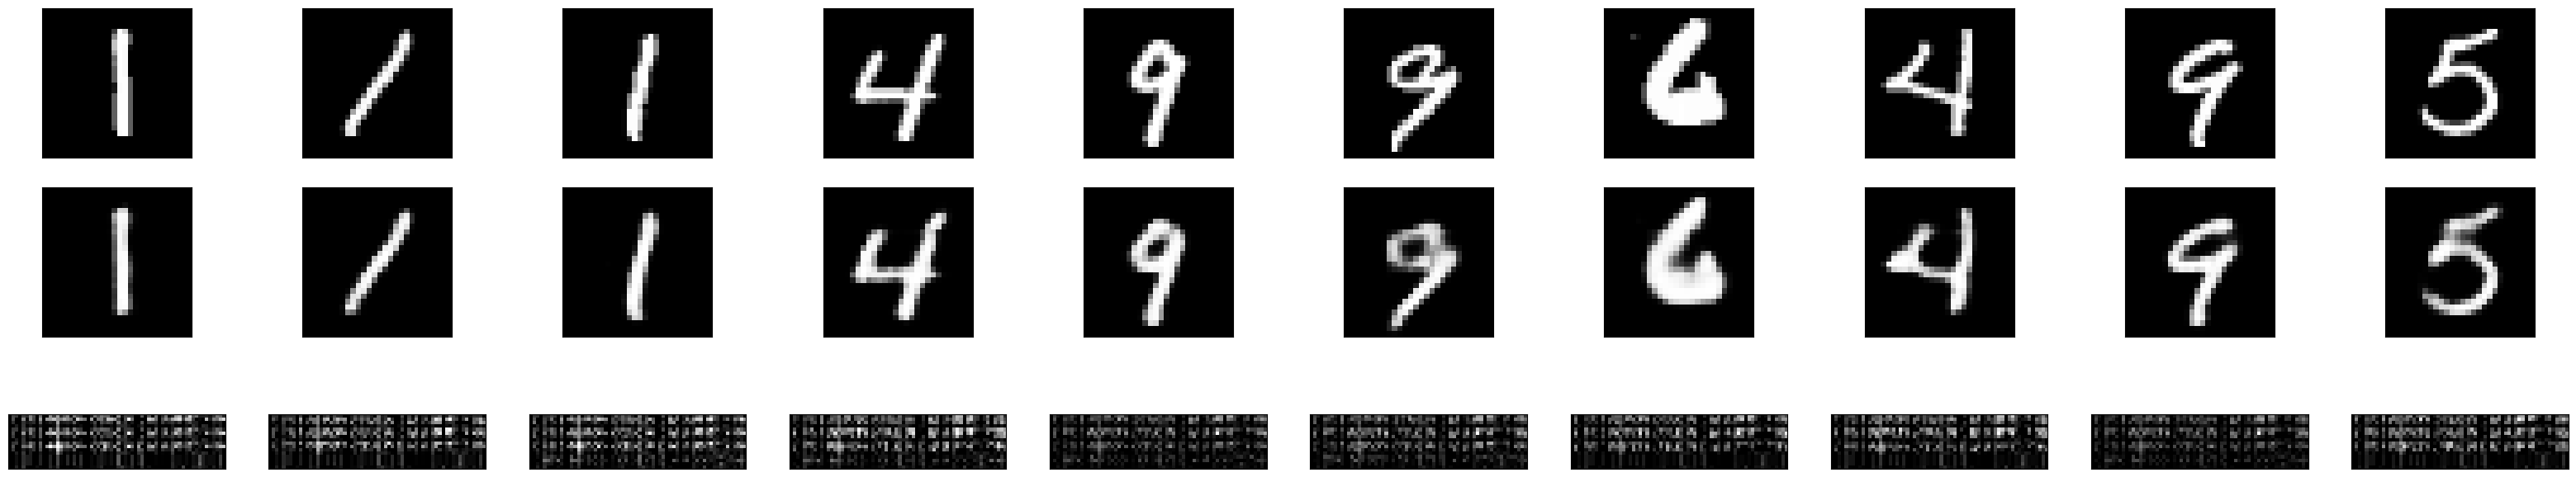

In [150]:
plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(np.reshape(test_imgs_decoded[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(np.reshape(test_imgs_encoded[i], (16, 64)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


We observe that the autoencoder works fairly well as the numbers after compressing and decompressing look very similar. The numbers "9" and "0" seem a bit blurred. It is difficult to see any structure in the decoded images. And: I just realized that the encoded space the numbers are mapped to has actually a higher dimension with the large number of filters I built into the network. Let me repeat by actually compressing, i.e. mapping the input to a smaller-dimensional space.

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))
input_encoder2 = (28, 28, 1)

encoder_model2 = keras.Sequential(

    [
        keras.Input(shape=input_encoder2),
        layers.Conv2D(8, kernel_size=(2, 2), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),        
        layers.Conv2D(8, kernel_size=(2, 2), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Conv2D(16, kernel_size=(2,2), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    ]
)

encoder_model2.summary()

input_decoder2 = (4, 4, 16)

decoder_model2 = keras.Sequential(

    [
        keras.Input(shape=input_decoder2),
        layers.Conv2D(16, kernel_size=(2, 2), activation="relu", padding='same'),
        layers.UpSampling2D(size=(2, 2)),        
        layers.Conv2D(8, kernel_size=(2, 2), activation="relu"),
        layers.UpSampling2D(size=(2,2)),
        layers.Conv2D(8, kernel_size=(2,2), activation='relu', padding='same'),
        layers.UpSampling2D(size=(2,2)),
        layers.Conv2D(1, (2, 2), activation='sigmoid', padding='same')
    ]
)

decoder_model2.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_159 (Conv2D)             │ (None, 28, 28, 8)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_160 (Conv2D)             │ (None, 14, 14, 8)      │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_161 (Conv2D)             │ (None, 7, 7, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_162 (Conv2D)             │ (None, 4, 4, 16)       │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_58 (UpSampling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_163 (Conv2D)             │ (None, 7, 7, 8)        │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_59 (UpSampling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_164 (Conv2D)             │ (None, 14, 14, 8)      │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_60 (UpSampling2D) │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_165 (Conv2D)             │ (None, 28, 28, 1)      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
autencoder2 = keras.Model(input_img, decoder_model2(encoder_model2(input_img)))
epochs = 20
batch_size = 128

autencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autencoder2.fit(x_train, x_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.4334
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1835
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1667
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1582
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1532
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1497
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1471
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1450
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1434
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1420
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1401
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1386
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1376
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1364
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s

In [139]:
test_imgs_encoded2 = encoder_model2(test_imgs)
test_imgs_decoded2 = decoder_model2(test_imgs_encoded2)

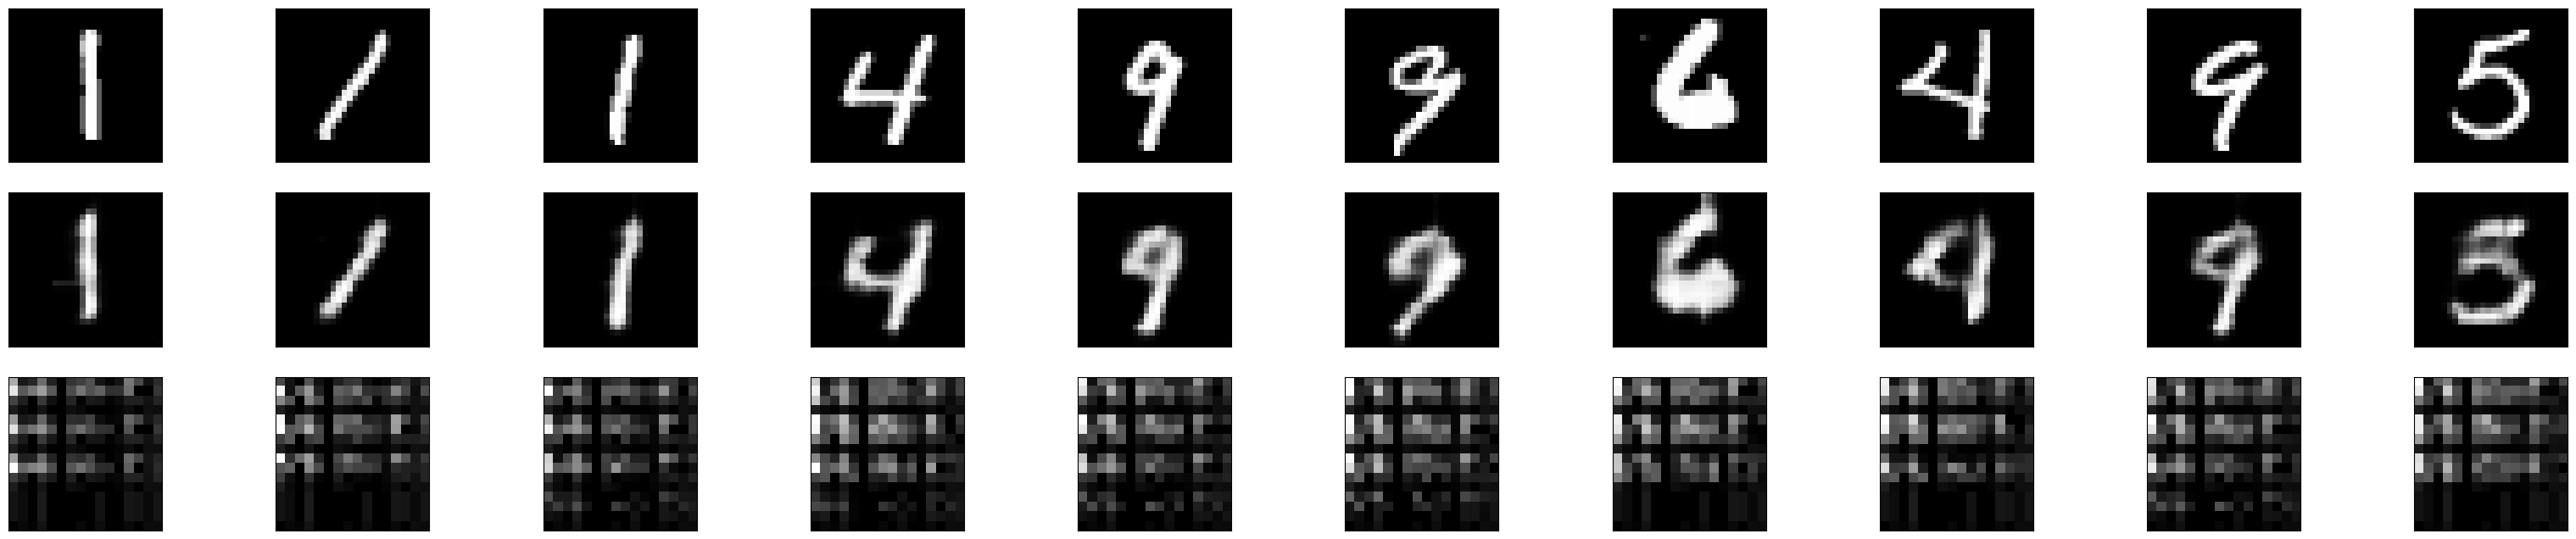

In [140]:
plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(np.reshape(test_imgs_decoded2[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(np.reshape(test_imgs_encoded2[i], (16, 16)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Given the two attempts, it seems that having only four filters in the first layer leads to higher losses. The filter number (8, 8, 16) seems to work better.\
Here, the encoder actually reduces the 784-dimensional input to a 256-dimensional one, so it is almost only a third. However, we find that the numbers get quite blurry. In particular "9", "5" and "4" are potentially hard to distinguish.

## Exercise 07.2:  Denoising Images

Creating noisy data by adding Gaussian distributed random variables with $\mu = 0$ and $\sigma = 0.2$ to the training data.

In [164]:
x_train_noisy = np.array([x_train[n] + np.random.normal(0, 0.2, size=(28, 28, 1)) for n in range(60000)])

Let's try to use the autoencoder2 model to train on the noisy data.

In [166]:
autencoder2 = keras.Model(input_img, decoder_model2(encoder_model2(input_img)))
epochs = 20
batch_size = 128

autencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autencoder2.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1532
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1427
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1404
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1391
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1383
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1373
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1365
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1362
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1354
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1349
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1344
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1338
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1337
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1331
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s

In [167]:
x_test_noisy = np.array([x_test[n] + np.random.normal(0, 0.2, size=(28, 28, 1)) for n in range(10000)])
test_imgs_noisy = x_test_noisy[random.choices(range(10000), k=10)]
test_imgs_encoded2_noisy = encoder_model2(test_imgs_noisy)
test_imgs_decoded2_noisy = decoder_model2(test_imgs_encoded2_noisy)

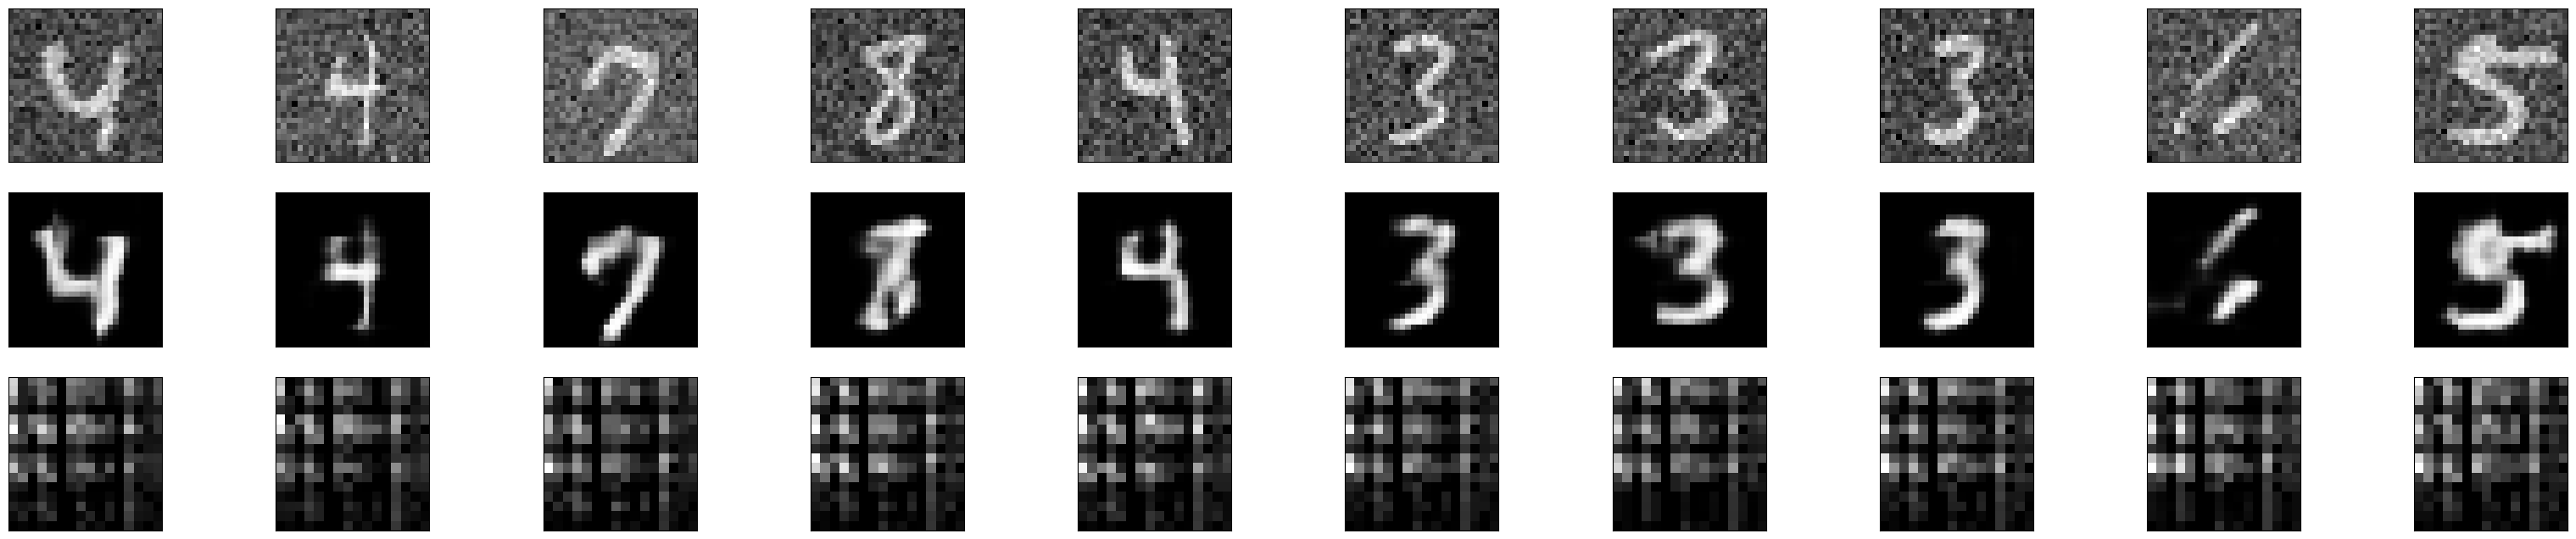

In [168]:
plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs_noisy[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(np.reshape(test_imgs_decoded2_noisy[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(np.reshape(test_imgs_encoded2_noisy[i], (16, 16)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

The denoising works in fact quite well. I suppose that increasing the dimension of the encoded images would help to increase the quality of this process. 

How does it work for a uniformly distributed noise?

In [185]:
x_test_uniform_noise = np.array([x_test[n] + np.random.uniform(-0.5, 0.5, size=(28, 28, 1)) for n in range(10000)])
test_imgs_uniform_noise = x_test_uniform_noise[random.choices(range(10000), k=10)]
test_imgs_encoded2_uniform_noise = encoder_model2(test_imgs_uniform_noise)
test_imgs_decoded2_uniform_noise = decoder_model2(test_imgs_encoded2_uniform_noise)

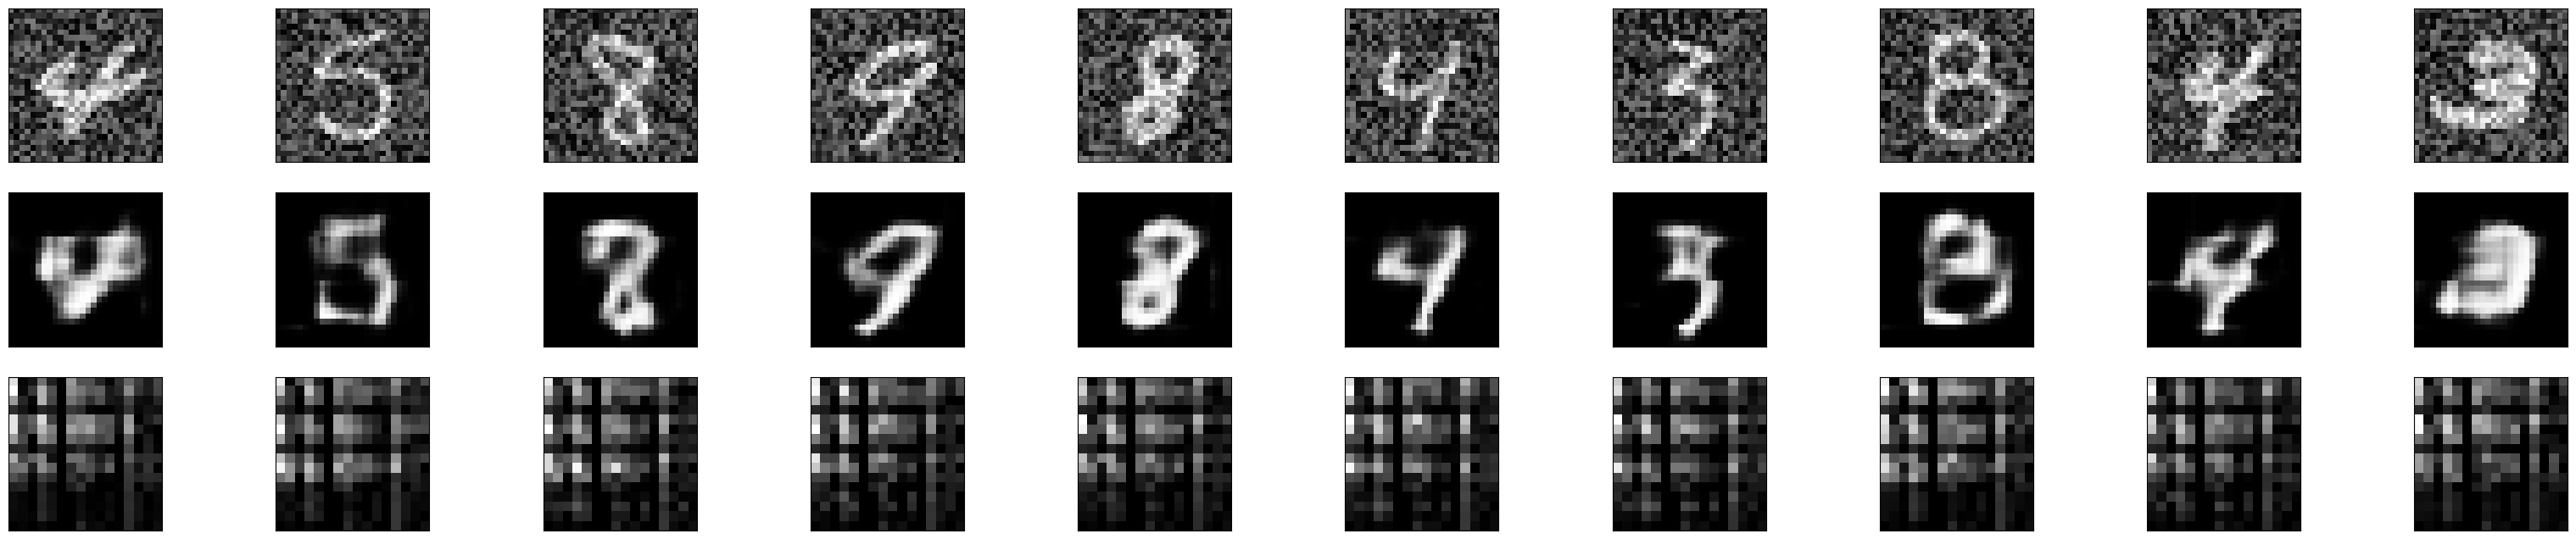

In [186]:
plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs_uniform_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(np.reshape(test_imgs_decoded2_uniform_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(np.reshape(test_imgs_encoded2_uniform_noise[i], (16, 16)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Uniformly distributed noise works okay for the noise lying in the interval (-0.5, 0.5). With noise strength of 1 for instance, numbers cannot be decrypted (or only hardly).

Let us go back to Gaussian noise and increase the standard deviation to check at which strength, the algorithm fails.

In [205]:
x_test_strong_noise = np.array([x_test[n] + np.random.normal(0, 0.4, size=(28, 28, 1)) for n in range(10000)])
rand_ind = random.choices(range(10000), k=10)
test_imgs_strong_noise = x_test_strong_noise[rand_ind]
test_imgs_encoded2_strong_noise = encoder_model2(test_imgs_strong_noise)
test_imgs_decoded2_strong_noise = decoder_model2(test_imgs_encoded2_strong_noise)

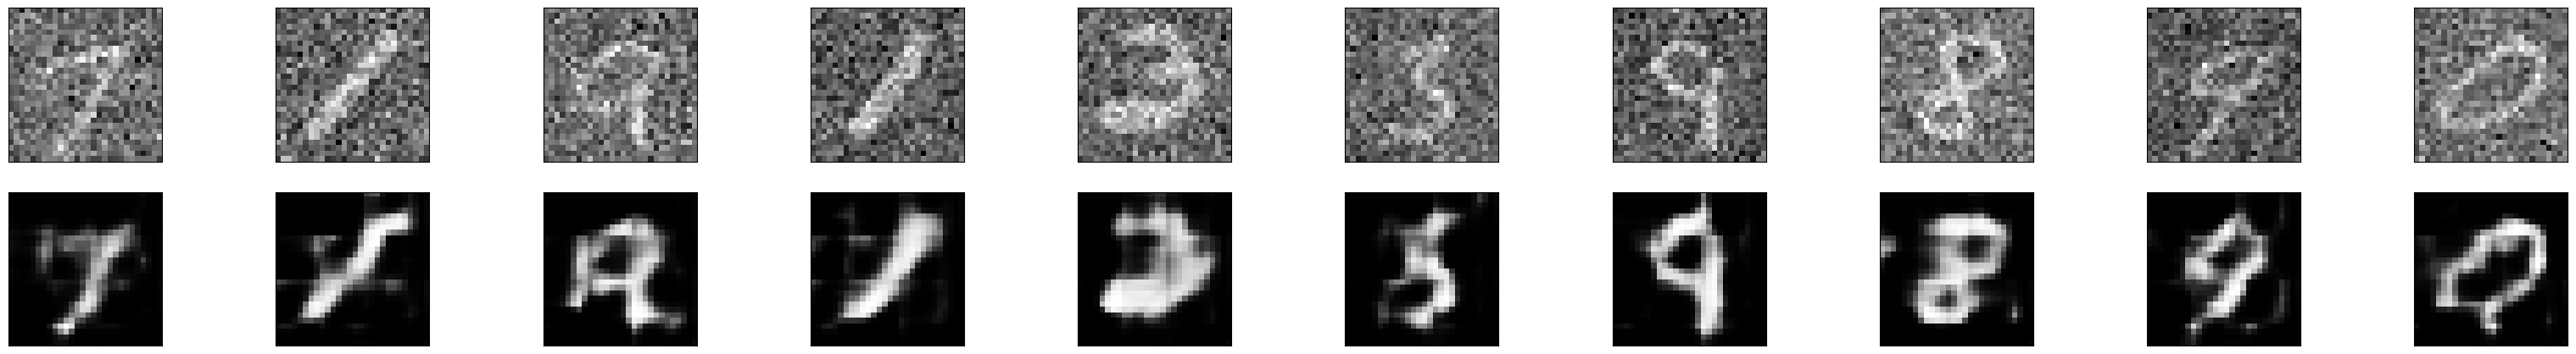

In [206]:
plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs_strong_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(np.reshape(test_imgs_decoded2_strong_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

The algorithm doesn't seem to generalize well for stronger noise. Given a standard deviation of $\sigma = 0.4$, the numbers are already hard to decipher. We can of course build a model with more filters to be able to filter stronger noise. This then however increases dimensionality of the space of the encoded data. Let's try the model we had before:

In [202]:
x_train_strong_noise = np.array([x_train[n] + np.random.normal(0, 0.4, size=(28, 28, 1)) for n in range(60000)])
autencoder.compile(optimizer='adam', loss='binary_crossentropy')
autencoder.fit(x_train_strong_noise, x_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1477
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1214
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1178
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1159
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1150
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1137
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1129
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1123
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1119
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1111
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1107
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1105
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1097
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1097
Epoch 15/20
469/469 ━━━━━━━━━

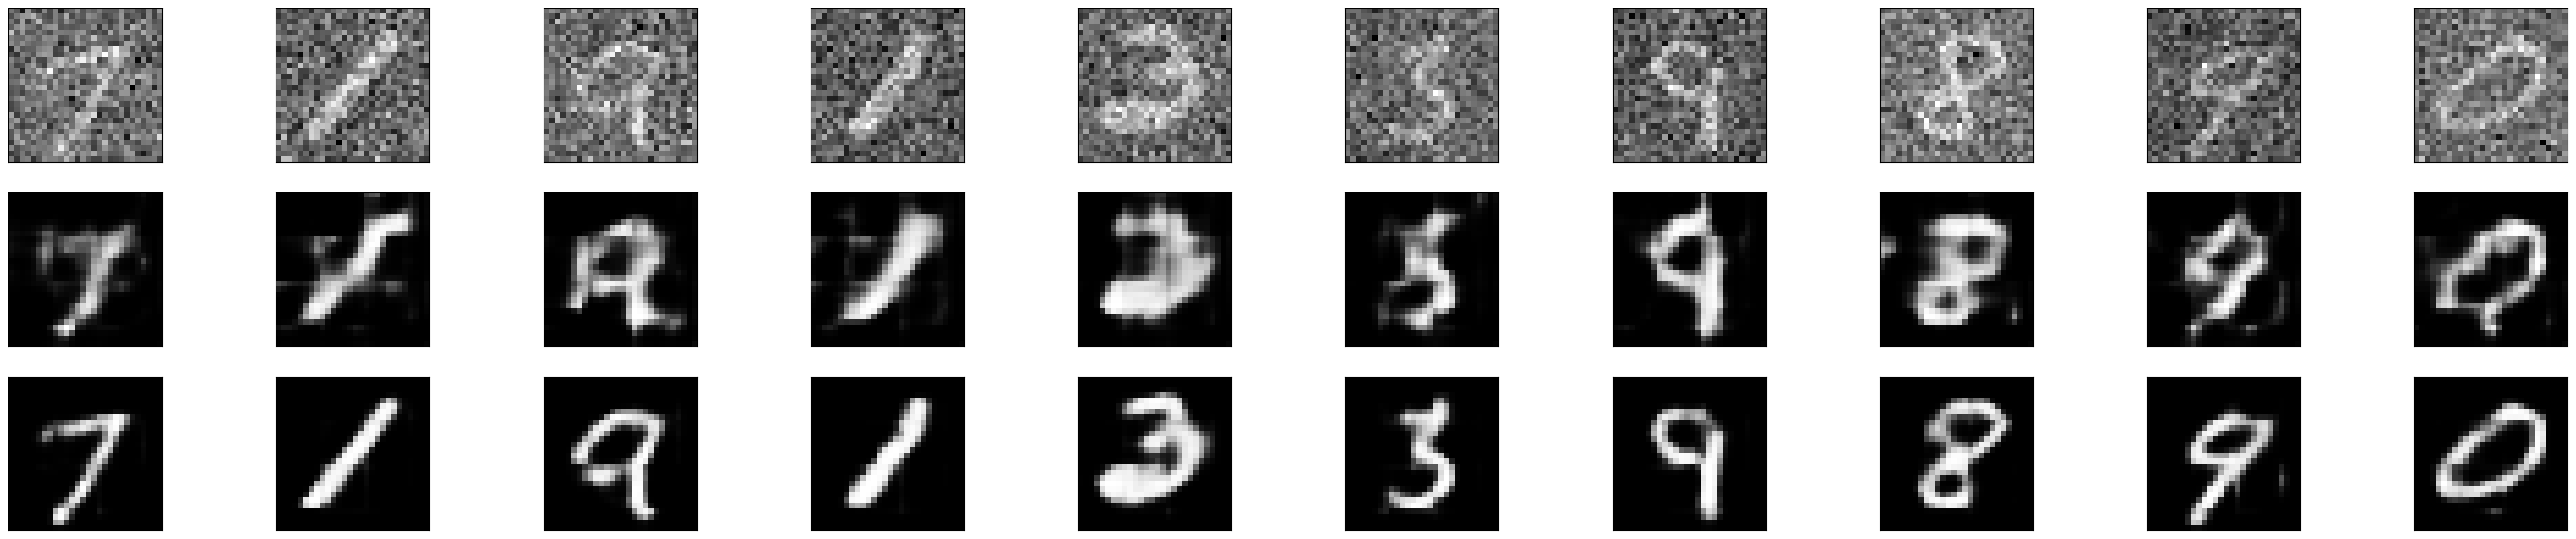

In [207]:
test_imgs_encoded_strong_noise = encoder_model(test_imgs_strong_noise)
test_imgs_decoded_strong_noise = decoder_model(test_imgs_encoded_strong_noise)

plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs_strong_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(np.reshape(test_imgs_decoded2_strong_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(np.reshape(test_imgs_decoded_strong_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

How does the strong noise autoencoder react to weak noise data?

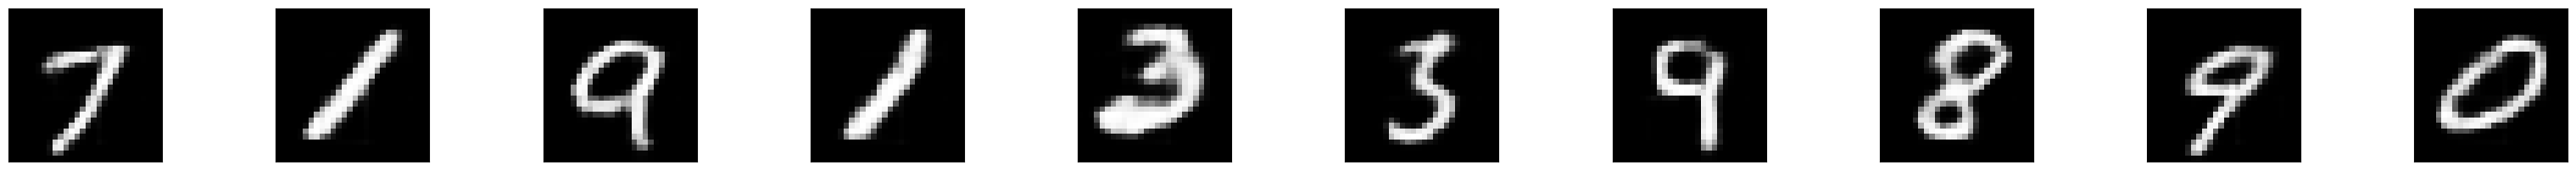

In [208]:
x_test_weak_noise = np.array([x_test[n] + np.random.normal(0, 0.1, size=(28, 28, 1)) for n in range(10000)])
test_imgs_weak_noise = x_test_weak_noise[rand_ind]
test_imgs_encoded_weak_noise = encoder_model(test_imgs_weak_noise)
test_imgs_decoded_weak_noise = decoder_model(test_imgs_encoded_weak_noise)

plt.figure(figsize=(40, 8))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs_weak_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.reshape(test_imgs_decoded_weak_noise[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

The autoencoder trained on strong noise generalizes very well for weak noise!